In [8]:
import sys
import os

# Append the project root to sys.path (one level up from notebooks)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)


Project root added to sys.path: c:\Users\rober\OneDrive\Desktop\516_fp\EuroSat_Segmentation_Project


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Import your segmentation functions from the src package
from src.segmentation.kmeans import kmeans_segmentation
from src.segmentation.fuzzy_cmeans import fuzzy_cmeans_segmentation

# Verify that the imports work by printing a success message
print("Segmentation modules imported successfully.")


Segmentation modules imported successfully.


In [10]:
# Define path to the EuroSAT (RGB) dataset folder
data_dir = "../data/raw/EuroSAT"

# List the available classes (folder names)
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print("Available Classes in EuroSAT:", classes)


Available Classes in EuroSAT: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


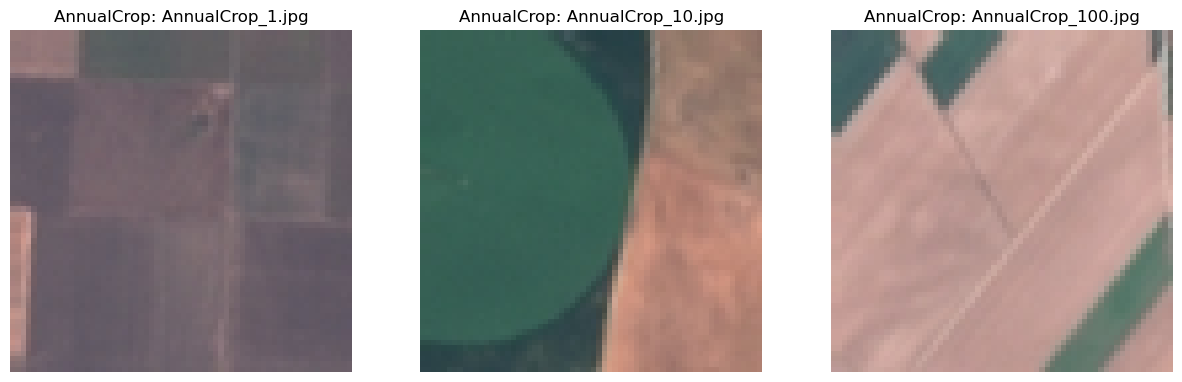

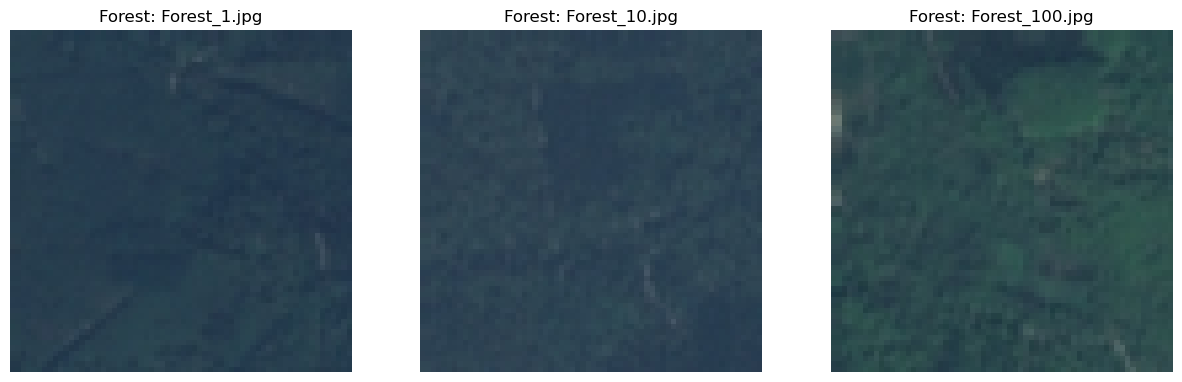

In [11]:
def show_sample_images(class_name, num_images=3):
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)[:num_images]
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, num_images, i+1)
            plt.imshow(img)
            plt.title(f"{class_name}: {img_file}")
            plt.axis("off")
        else:
            print(f"Failed to load {img_path}")
    plt.show()

# Display sample images for the first two classes
for cls in classes[:2]:
    show_sample_images(cls)


Converged in 21 iterations.


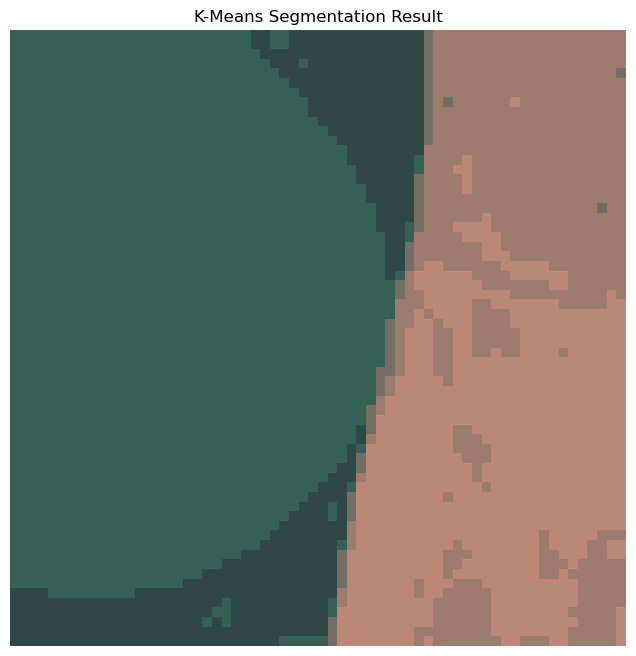

In [13]:
# Choose a test image from the "Forest" class; adjust filename if needed.
test_img_path = os.path.join(data_dir, "AnnualCrop", "AnnualCrop_10.jpg")
image = cv2.imread(test_img_path)
if image is None:
    print("Test image not found. Check the file path!")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Set the number of clusters for K-Means segmentation.
    k = 5
    labels, centroids = kmeans_segmentation(image, k)
    
    # Create the segmented image by replacing each pixel with its centroid color.
    segmented_image = centroids[labels]
    
    plt.figure(figsize=(8, 8))
    plt.imshow(segmented_image.astype(np.uint8))
    plt.title("K-Means Segmentation Result")
    plt.axis("off")
    plt.show()


Fuzzy C-Means converged in 60 iterations.


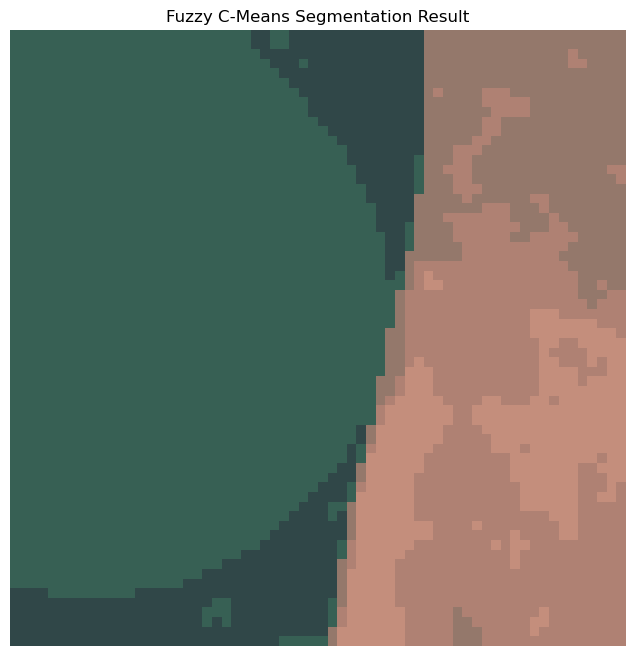

In [14]:
if image is not None:
    # Set the number of clusters and fuzziness parameter
    k = 5
    m = 2  # fuzziness parameter (commonly 2)
    labels_fcm, centroids_fcm, u = fuzzy_cmeans_segmentation(image, k, m)
    
    # Build the segmented image using the Fuzzy C-Means result.
    segmented_image_fcm = centroids_fcm[labels_fcm]
    
    plt.figure(figsize=(8, 8))
    plt.imshow(segmented_image_fcm.astype(np.uint8))
    plt.title("Fuzzy C-Means Segmentation Result")
    plt.axis("off")
    plt.show()


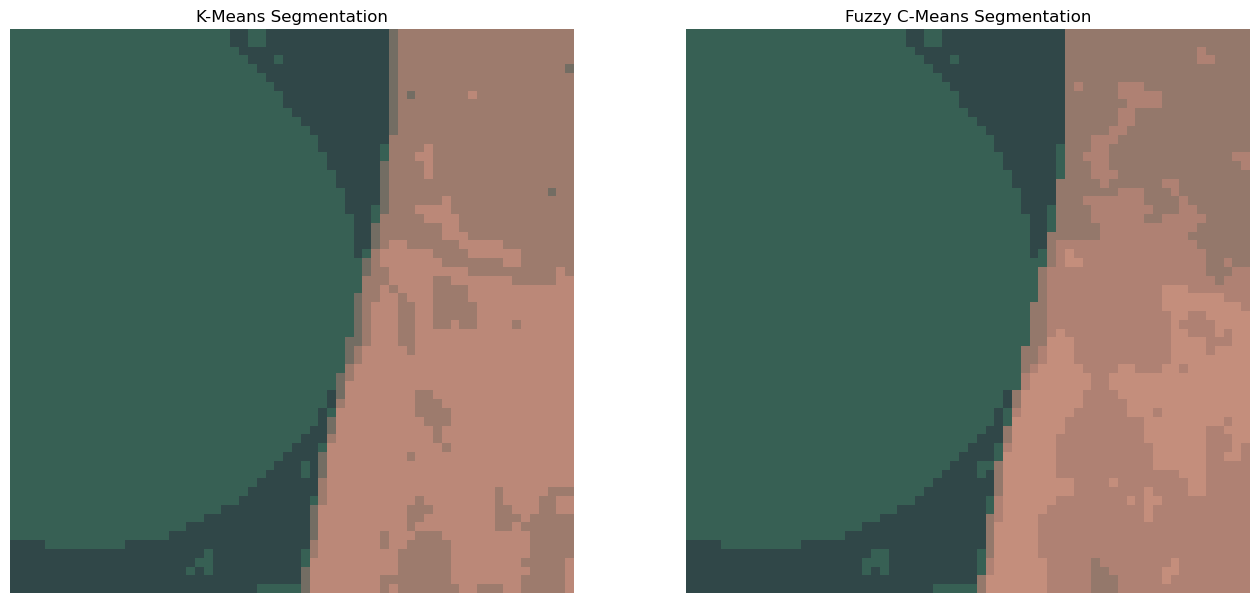

In [15]:
if image is not None:
    plt.figure(figsize=(16, 8))
    
    plt.subplot(1, 2, 1)
    plt.imshow(segmented_image.astype(np.uint8))
    plt.title("K-Means Segmentation")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image_fcm.astype(np.uint8))
    plt.title("Fuzzy C-Means Segmentation")
    plt.axis("off")
    
    plt.show()


## Observations

- **K-Means Segmentation:**  
  The segmented image shows distinct regions with uniform colors corresponding to the k centroids. The boundaries are relatively crisp.

- **Fuzzy C-Means Segmentation:**  
  The segmented image appears similar in the final output since we are taking the maximum membership to assign each pixel a label. However, the underlying membership matrix indicates soft clustering where pixels may have partial membership across clusters.

- **Comparison:**  
  The two methods have slightly different results, but one does not appear to have a distinct advantage over the other. They both performed similarly in terms of segmentation quality, with only minor differences observed in the output.

- **Performance:**  
  One major difference is the computation time. The Fuzzy C-Means method took significantly longer (34.4 seconds) than K-Means (which took 0.0 seconds over 21 iterations), highlighting a clear trade-off between the methods in terms of efficiency.
